# Generate training and prediction data from insitu and gridded datasets

More datasets are here! https://dap.tern.org.au/thredds/catalog/ecosystem_process/ozflux/catalog.html



## Load modules

In [1]:
import sys
sys.path.append('/g/data/os22/chad_tmp/NEE_modelling/')
from collect_training_data import extract_ec_gridded_data

In [43]:
import xarray as xr
import pandas as pd
    # load flux data from site
flux = xr.open_dataset('/g/data/os22/chad_tmp/NEE_modelling/data/ec_netcdfs/Great_EC_site.nc')

In [49]:
flux = pd.read_csv('/g/data/os22/chad_tmp/NEE_modelling/results/training_data/Great_training_data.csv', index_col='time', parse_dates=True)
flux.columns

Index(['NEE_SOLO_EC', 'GPP_SOLO_EC', 'ER_SOLO_EC', 'ET_EC', 'Ta_EC', 'Sws_EC',
       'RH_EC', 'Precip_EC', 'Fn_EC', 'Fe_EC', 'Fh_EC', 'Fsd_EC', 'Fld_EC',
       'CO2_EC', 'VPD_EC', 'LAI_RS', 'EVI_RS', 'LST_RS', 'FPAR_RS',
       'tree_cover_RS', 'nontree_cover_RS', 'nonveg_cover_RS', 'LST-Tair_RS',
       'AI_RS', 'TWI_RS', 'NDWI_RS', 'Months_since_burn_RS', 'PFT_RS',
       'solar_RS', 'Ta_RS', 'VPD_RS', 'precip_RS', 'precip_cml_3_RS',
       'precip_cml_6_RS', 'x_coord', 'y_coord', 'LST-Tair_EC'],
      dtype='object')

<AxesSubplot:xlabel='time'>

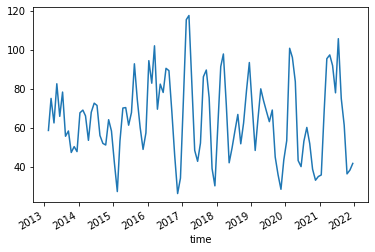

In [67]:
flux['precip_cml_3_RS'].plot()

<AxesSubplot:xlabel='time'>

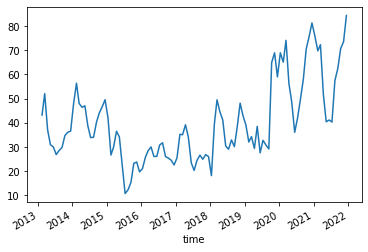

In [51]:
flux.GPP_SOLO_EC.plot()

<AxesSubplot:xlabel='time'>

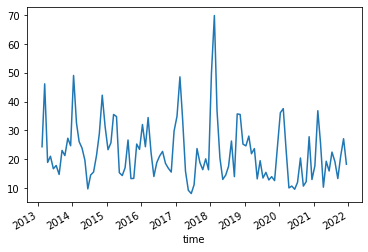

In [53]:
flux.ER_SOLO_EC.plot()

<AxesSubplot:xlabel='time'>

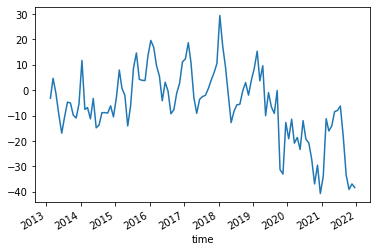

In [52]:
flux.NEE_SOLO_EC.plot()

In [30]:
flux

<xarray.Dataset>
Dimensions:    (time: 107, latitude: 1, longitude: 1)
Coordinates:
  * time       (time) datetime64[ns] 2013-02-01T00:30:00 ... 2021-12-01T00:30:00
  * latitude   (latitude) float64 -30.19
  * longitude  (longitude) float64 120.7
Data variables: (12/30)
    AH         (time, latitude, longitude) float64 ...
    CO2        (time, latitude, longitude) float64 ...
    ER_LT      (time, latitude, longitude) float64 ...
    ER_SOLO    (time, latitude, longitude) float64 ...
    ET         (time, latitude, longitude) float64 ...
    Fco2       (time, latitude, longitude) float64 ...
    ...         ...
    Ta         (time, latitude, longitude) float64 ...
    Ts         (time, latitude, longitude) float64 ...
    VP         (time, latitude, longitude) float64 ...
    Ws         (time, latitude, longitude) float64 ...
    ps         (time, latitude, longitude) float64 ...
    ustar      (time, latitude, longitude) float64 ...
Attributes: (12/52)
    Conventions:              CF-1.8
    acknowledgement:          This work used eddy covariance data collected b...
    altitude:                 450m
    canopy_height:            18
    comment:                  CF metadata, OzFlux standard variable names
    contact:                  Suzanne Prober
    ...                       ...
    time_coverage_start:      2013-02-01 00:30:00
    time_step:                monthly
    time_zone:                Australia/Perth
    title:                    Flux tower data set from the GWW site for the c...
    tower_height:             36
    vegetation:               sparse eucalypt woodland

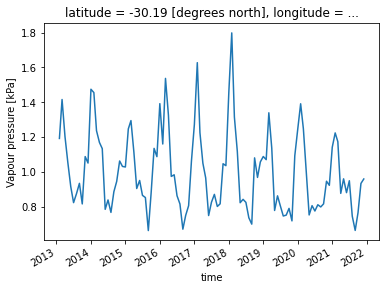

In [42]:
flux.VP.plot()

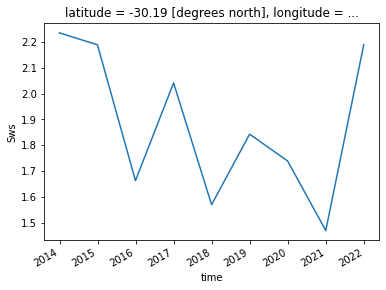

In [39]:
flux.Sws.resample(time='1Y').sum().plot()

## Collect training data from EC towers, and gridded data at pixel location of EC tower

This data is used for training the models.


In [ ]:
suffixes = [
#     'Emerald/2022_v1/L6/default/Emerald_L6_20110610_20131231_Monthly.nc',
#     'GreatWesternWoodlands/2022_v1/L6/default/GreatWesternWoodlands_L6_20130101_20220101_Monthly.nc',
#     'CowBay/2022_v1/L6/default/CowBay_L6_20090101_20211231_Monthly.nc',
#     'Tumbarumba/2021_v1/L6/default/Tumbarumba_L6_20020107_20191231_Monthly.nc',
#     'Whroo/2021_v1/L6/default/Whroo_L6_20111201_20210724_Monthly.nc',
#     'WombatStateForest/2022_v1/L6/default/WombatStateForest_L6_20100120_20210529_Monthly.nc',
#     'WallabyCreek/2022_v1/L6/default/WallabyCreek_L6_20050825_20130409_Monthly.nc',
#     'RobsonCreek/2022_v1/L6/default/RobsonCreek_L6_20130801_20211218_Monthly.nc',
#     'CapeTribulation/2022_v1/L6/default/CapeTribulation_L6_20100101_20181102_Monthly.nc',
#     'AliceSpringsMulga/2022_v1/L6/default/AliceSpringsMulga_L6_20100903_20211231_Monthly.nc',
#     'CalperumChowilla/2022_v1/L6/default/Calperum_L6_20100730_20220216_Monthly.nc',
#     'DryRiver/2022_v1/L6/default/DryRiver_L6_20091025_20220218_Monthly.nc',
#     'Litchfield/2021_v1/L6/default/Litchfield_L6_20150623_20210725_Monthly.nc',
#     'SturtPlains/2021_v1/L6/default/SturtPlains_L6_20080828_20210724_Monthly.nc',
#     'RiggsCreek/2022_v1/L6/default/RiggsCreek_L6_20110101_20170712_Monthly.nc', #dryland cropping
#     'Otway/2021_v1/L6/default/Otway_L6_20070811_20110101_Monthly.nc', # pasture site
#     'Yanco/2022_v1/L6/default/Yanco_L6_20130101_20220218_Monthly.nc', # soil site
    
    
#     ## check the location of these ones below as they are new additions
#     'Gingin/2022_v1/L6/default/Gingin_L6_20111013_20201231_Monthly.nc', # native Banksia woodland
#     'LongreachMitchellGrassRangeland/2022_v1/L6/default/Longreach_L6_20181009_20210909_Monthly.nc',
#     'Ridgefield/2022_v1/L6/default/Ridgefield_L6_20160101_20220218_Monthly.nc', #  dryland agriculture
#     'SilverPlains/2022_v1/L6/default/SilverPlains_L6_20200101_20211231_Monthly.nc', #Australian Mountain Reseach 
#     'DalyUncleared/2022_v1/L6/default/DalyUncleared_L6_20080101_20220217_Monthly.nc', #Woodland savanna
#     'Collie/2022_v1/L6/default/Collie_L6_20170804_20191111_Monthly.nc', # wandoo woodland
#     'AdelaideRiver/2022_v1/L6/default/AdelaideRiver_L6_20071017_20090524_Monthly.nc', #  Savanna dominated by Eucalyptus
#     'Warra/2022_v1/L6/default/Warra_L6_20130305_20210923_Monthly.nc', #tasmania
    
    ### ----------Problematic sites--------
    #'DalyPasture/2022_v1/L6/default/DalyPasture_L6_20080101_20130908_Monthly.nc', #incorrect geographic coordinates
    'CumberlandPlain/2022_v1/L6/default/CumberlandPlain_L6_20140101_20220101_Monthly.nc',# small remnant bushland block in ag district
    #'SamfordEcologicalResearchFacility/2022_v1/L6/default/Samford_L6_20100602_20171231_Monthly.nc', #fragmented landscape 5km resolution not good enough
    #'Boyagin/2022_v1/L6/default/Boyagin_L6_20171020_20211231_Monthly.nc', #Same grid cell as Rigdeland, in remnant forest BORDERLINE MIGHT BE OKAY
    #'TiTreeEast/2022_v1/L6/default/TiTreeEast_L6_20120718_20220117_Monthly.nc', # on same grid cell as Alice Springs
    #'RedDirtMelonFarm/2021_v1/L6/default/RedDirtMelonFarm_L6_20110923_20130721_Monthly.nc', #small farm in the middle of svannah woodland
    
    #'FoggDam/2021_v1/L6/default/FoggDam_L6_20060207_20081031_Monthly.nc' # wetland that floods seasonally
    # 'Loxton/2022_v1/L6/default/Loxton_L6_20080819_20090609_Monthly.nc' # almond tress, 1 year of data
    
]

i=0
sites = []
for suffix in suffixes:
    print(" {:02}/{:02}\r".format(i + 1, len(suffixes)), end="")
    xx = extract_ec_gridded_data(suffix, scale='1km', save_ec_data=True)
    sites.append(xx)
    i+=1
    

## Examine sites

In [1]:
import os
import geopandas as gpd
import pandas as pd

In [2]:
base = '/g/data/os22/chad_tmp/NEE_modelling/results/training_data/'
sites = os.listdir('/g/data/os22/chad_tmp/NEE_modelling/results/training_data/')

td = []
for site in sites:
    if '.csv' in site:
        xx = pd.read_csv(base+site, index_col='time', parse_dates=True)
        xx['site'] = site[0:5]
        td.append(xx)

ts = pd.concat(td)#.dropna()
# sites = ts[['site', 'x_coord','y_coord']]
# sites = sites.drop_duplicates().reset_index(drop=True)
# gdf = gpd.GeoDataFrame(
#     sites, geometry=gpd.points_from_xy(sites.x_coord, sites.y_coord), crs='epsg:4326')

# gdf = gdf.drop(['x_coord', 'y_coord'],axis=1)

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import skew

/g/data/os22/chad_tmp/NEE_modelling/env/nee/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/g/data/os22/chad_tmp/NEE_modelling/env/nee/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/g/data/os22/chad_tmp/NEE_modelling/env/nee/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either 

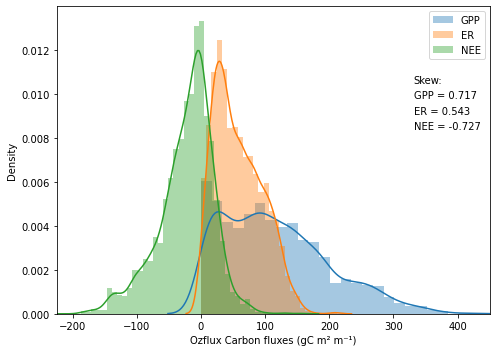

In [6]:
fig,ax = plt.subplots(1,1, figsize=(7,5))
sns.distplot(ts.GPP_SOLO_EC, ax=ax, label='GPP')
sns.distplot(ts.ER_SOLO_EC, ax=ax, label='ER')
sns.distplot(ts.NEE_SOLO_EC, ax=ax, label='NEE')
s_nee = skew(ts.NEE_SOLO_EC)
s_gpp = skew(ts.GPP_SOLO_EC)
s_er = skew(ts.ER_SOLO_EC)
ax.legend()
ax.text(.825, .75, 'Skew:',transform=ax.transAxes)
ax.text(.825, .7, 'GPP = {:.3f}'.format(s_gpp),
                transform=ax.transAxes)
ax.text(.825, .65, 'ER = {:.3f}'.format(s_er),
                transform=ax.transAxes)
ax.text(.825, .6, 'NEE = {:.3f}'.format(s_nee),
                transform=ax.transAxes)
ax.set_xlabel('Ozflux Carbon fluxes (gC m\N{SUPERSCRIPT TWO} m⁻¹)')
ax.set_xlim(-225,450)
plt.tight_layout()
plt.savefig('/g/data/os22/chad_tmp/NEE_modelling/results/figs/ozflux_carbon_flux_distributions.png');

In [ ]:
gdf.explore(column='site', marker_kwds={'radius':1000, 'fill':True}, marker_type ='circle',
            tiles='https://server.arcgisonline.com/ArcGIS/rest/services/World_Imagery/MapServer/tile/{z}/{y}/{x}', attr='Esri'
           )

## Collate gridded data for predictions

This data is used to predict on, results of this are stored here `/g/data/os22/chad_tmp/NEE_modelling/results/predicton_data/prediction_data_YYYY.nc`

In [ ]:
import sys
sys.path.append('/g/data/os22/chad_tmp/NEE_modelling/')
from collect_prediction_data import collect_prediction_data

In [ ]:
t1, t2='2003','2021'

In [ ]:
ds = collect_prediction_data(time_start=t1, time_end=t2, verbose=True)
ds